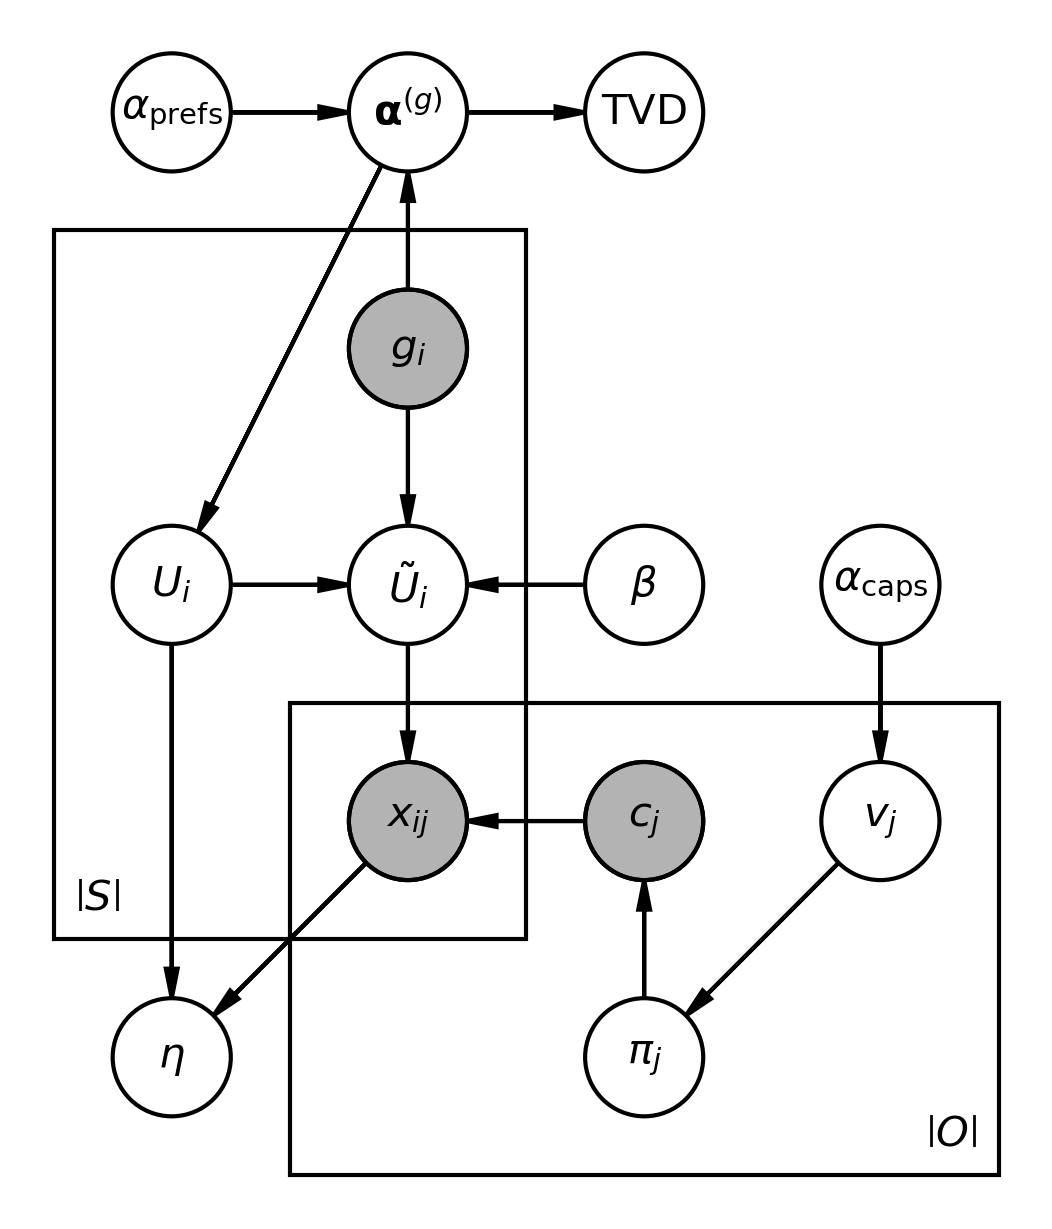

In [1]:
from daft import PGM

# Create a new PGM for the full Mathematical Model
pgm = PGM()


# First row
pgm.add_node("alpha_prefs", r"$\alpha_\mathrm{prefs}$", 1, 4)
pgm.add_node("alpha", r"$\mathbf{\alpha}^{(g)}$", 2, 4)
pgm.add_node("tvd", r"$\mathrm{TVD}$", 3, 4)
pgm.add_edge("alpha_prefs", "alpha")
pgm.add_edge("alpha", "tvd")

# Second row
pgm.add_node("g", r"$g_i$", 2, 3, observed=True)
pgm.add_edge("g", "alpha")

# Third row
pgm.add_node("U", r"$U_i$", 1, 2)
pgm.add_node("biased_U", r"$\tilde{U}_i$", 2, 2)
pgm.add_node("bias", r"$\beta$", 3, 2)
pgm.add_node("alpha_caps", r"$\alpha_\mathrm{caps}$", 4, 2)
pgm.add_edge("alpha", "U")
pgm.add_edge("U", "biased_U")
pgm.add_edge("bias", "biased_U")
pgm.add_edge("g", "biased_U")

# Fourth row
pgm.add_node("x", r"$x_{ij}$", 2, 1, observed=True)
pgm.add_node("c", r"$c_j$", 3, 1, observed=True)
pgm.add_node("v", r"$v_j$", 4, 1)
pgm.add_edge("biased_U", "x")
pgm.add_edge("c", "x")
pgm.add_edge("alpha_caps", "v")

# Fifth row
pgm.add_node("eta", r"$\eta$", 1, 0)
pgm.add_node("pi", r"$\pi_j$", 3, 0)
pgm.add_edge("x", "eta")
pgm.add_edge("U", "eta")
pgm.add_edge("pi", "c")
pgm.add_edge("v", "pi")

pgm.add_plate([0.5, 0.5, 2, 3], label=r"$\left|S\right|$", position="bottom left")
pgm.add_plate([1.5, -0.5, 3, 2], label=r"$\left|O\right|$", position="bottom right")

# Render the diagram
pgm.render(dpi=300)
pgm.savefig("plate_diagram.pdf")